<a href="https://colab.research.google.com/github/hilmizr/thesis-yolo/blob/main/01_YOLO26n_%5BTHESIS%5DMasKris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries

In [1]:
!pip install ultralytics roboflow gdown thop

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


# Import Libraries

In [2]:
import os
import shutil
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from scipy.spatial.distance import jensenshannon
from IPython.display import display
from PIL import Image
import cv2
import json
from shutil import copyfile
import sys
import os
import requests
from pathlib import Path
import random
import pathlib

# Setup Custom YOLO

In [3]:
from ultralytics import YOLO
from ultralytics.models import yolo

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Compile Model

In [4]:
modif_model = YOLO("/content/yolo26n.pt")

# Setup Dataset

## Download Dataset

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="e3DAOLcZTZkR7VlO5jY2")
project = rf.workspace("pcithesis").project("mkthesis-v4-kfvrb")
version = project.version(3)
dataset = version.download("yolo26")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to mkthesis-v4-3 in yolo26:: 100%|██████████| 7243/7243 [00:00<00:00, 9432.38it/s] 


In [6]:
data_yaml_path="/content/mkthesis-v4-3/data.yaml"

# Modeling

In [7]:
modif_model.train(
    data=data_yaml_path,
    epochs=100,

    # spatial / batch
    imgsz=640,            # will train on 640×640 images (3 channels assumed)

    # early stopping & checkpointing
    patience=10,
    save=True,
    save_period=-1,

    device=0
)

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/mkthesis-v4-3/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/yolo26n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b493405f620>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Evaluate

## Assess GFLOPs, Parameters, and Size

In [8]:
best_weights = '/content/runs/detect/train/weights/best.pt'
best_model   = YOLO(best_weights)
print("----- Detailed Model Summary (verbose) -----")
best_model.info(verbose=True)
size_bytes = os.path.getsize(best_weights)
size_mb    = size_bytes / (1024 ** 2)
print(f"Checkpoint file size: {size_mb:.2f} MB")

----- Detailed Model Summary (verbose) -----
YOLO26n summary: 260 layers, 2,504,190 parameters, 0 gradients, 5.8 GFLOPs
Checkpoint file size: 5.15 MB


In [9]:
from thop import profile
import torch
best_model.model.to('cuda')
input = torch.randn(1, 3, 640, 640).to('cuda')
macs, params = profile(best_model.model, inputs=(input, ))
gflops = macs / 1e9
print(f"GFLOPs: {gflops:.2f}")

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_upsample() for <class 'torch.nn.modules.upsampling.Upsample'>.
GFLOPs: 2.89


In [10]:
# Save model summary
with open("model_summary.txt", "w") as f:
    f.write("----- Model Summary -----\n")
    f.write(f"Parameters: {params:,}\n")
    f.write(f"Checkpoint file size: {size_mb:.2f} MB\n")
    f.write(f"GFLOPs: {gflops:.2f}\n")

## Evaluate on Test Set

In [11]:
test_results = best_model.val(
    data=data_yaml_path,
    split='test',
    save_json=True,
    save_txt=True,
    plots=True,
    verbose=True
)

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO26n summary (fused): 122 layers, 2,375,031 parameters, 0 gradients, 5.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1269.4±444.1 MB/s, size: 34.5 KB)
val: Scanning /content/mkthesis-v4-3/test/labels... 362 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 362/362 1.5Kit/s 0.2s
val: New cache created: /content/mkthesis-v4-3/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 23/23 2.5it/s 9.4s
                   all        362       1427      0.851      0.758      0.837      0.456
Speed: 1.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.2ms postprocess per image
Saving /content/runs/detect/val/predictions.json...
Results saved to /content/runs/detect/val


In [12]:
precision = test_results.box.mp
recall = test_results.box.mr
f1_score = 2 * (precision * recall) / (precision + recall + 1e-6)

In [13]:
# Print key metrics
print(f"Test mAP50: {test_results.box.map50:.4f}")
print(f"Test mAP50-95: {test_results.box.map:.4f}")
print(f"Test mAP75: {test_results.box.map75:.4f}")
print(f"Test Precision: {test_results.box.mp:.4f}")
print(f"Test Recall: {test_results.box.mr:.4f}")
print(f"Test F1 Score: {f1_score:.4f}")

Test mAP50: 0.8368
Test mAP50-95: 0.4564
Test mAP75: 0.4472
Test Precision: 0.8512
Test Recall: 0.7582
Test F1 Score: 0.8020


In [14]:
# Save test metrics
with open("test_metrics.txt", "w") as f:
    f.write("----- Test Metrics -----\n")
    f.write(f"Test mAP50: {test_results.box.map50:.4f}\n")
    f.write(f"Test mAP75: {test_results.box.map75:.4f}\n")
    f.write(f"Test mAP50-95: {test_results.box.map:.4f}\n")
    f.write(f"Test Precision: {test_results.box.mp:.4f}\n")
    f.write(f"Test Recall: {test_results.box.mr:.4f}\n")
    f.write(f"Test F1 Score: {f1_score:.4f}\n")

## Export Confusion Matrices as CSV

In [15]:
cm_test = test_results.confusion_matrix.matrix
np.savetxt("cm_test.csv", cm_test, delimiter=",", fmt="%.0f")

## Export Per-Class Metrics

In [16]:
# ---- Export Per-Class Metrics ----
num_classes = len(test_results.box.p)
per_class_metrics = pd.DataFrame({
    "Class ID": np.arange(num_classes),
    "Class Name": [best_model.names[i] for i in range(num_classes)],
    "Precision": test_results.box.p,
    "Recall": test_results.box.r,
    "F1 Score": test_results.box.f1,
    "AP50": test_results.box.ap50,
    "AP50-95": test_results.box.ap
})
per_class_metrics.to_csv("per_class_metrics.csv", index=False)
print("✅ Exported per_class_metrics.csv")

✅ Exported per_class_metrics.csv


## Plot LR Progression Against Loss & mAP

In [17]:
results_csv = Path('/content/runs/detect/train/results.csv')
df = pd.read_csv(results_csv)
print(df.columns)

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2', 'lr/pg3', 'lr/pg4', 'lr/pg5', 'lr/pg6',
       'lr/pg7'],
      dtype='object')


In [18]:
df

epoch       time  train/box_loss  train/cls_loss  train/dfl_loss  \
0       1    97.3092         2.54976         5.75109         0.01074   
1       2   146.2340         2.26094         4.45024         0.00884   
2       3   188.6440         2.16426         3.37840         0.00827   
3       4   228.7180         2.13257         2.78650         0.00817   
4       5   269.3690         2.09030         2.46932         0.00804   
..    ...        ...             ...             ...             ...   
95     96  3962.8600         1.53473         0.82330         0.00585   
96     97  4003.1800         1.53153         0.80576         0.00590   
97     98  4043.7400         1.52380         0.80811         0.00582   
98     99  4084.6200         1.51649         0.80816         0.00586   
99    100  4125.2600         1.52539         0.80084         0.00579   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                0.36798            0.02418           0.03279   
1                0.35607            0.22546           0.19073   
2                0.45847            0.32219           0.32982   
3                0.53137            0.42098           0.44049   
4                0.56358            0.46799           0.49228   
..                   ...                ...               ...   
95               0.85276            0.76814           0.85409   
96               0.85210            0.77859           0.85612   
97               0.84906            0.77218           0.85575   
98               0.85693            0.77312           0.85887   
99               0.85158            0.77538           0.85580   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0               0.01071       2.09419       5.99259       0.00942  0.001989   
1               0.06906       1.96080       3.68607       0.00859  0.003949   
2               0.12769       1.94507       2.56893       0.00881  0.005870   
3               0.17866       1.92184       1.92026       0.00871  0.005822   
4               0.20348       1.88928       1.79679       0.00849  0.005762   
..                  ...           ...           ...           ...       ...   
95              0.47432       1.60167       0.79480       0.00647  0.000357   
96              0.47388       1.59503       0.79410       0.00638  0.000298   
97              0.47240       1.59482       0.79507       0.00642  0.000238   
98              0.47300       1.59420       0.79291       0.00642  0.000179   
99              0.47675       1.58781       0.79271       0.00642  0.000119   

      lr/pg1    lr/pg2    lr/pg3    lr/pg4    lr/pg5    lr/pg6    lr/pg7  
0   0.000663  0.001989  0.000663  0.001989  0.000663  0.001989  0.000663  
1   0.001316  0.003949  0.001316  0.003949  0.001316  0.003949  0.001316  
2   0.001957  0.005870  0.001957  0.005870  0.001957  0.005870  0.001957  
3   0.001941  0.005822  0.001941  0.005822  0.001941  0.005822  0.001941  
4   0.001921  0.005762  0.001921  0.005762  0.001921  0.005762  0.001921  
..       ...       ...       ...       ...       ...       ...       ...  
95  0.000119  0.000357  0.000119  0.000357  0.000119  0.000357  0.000119  
96  0.000099  0.000298  0.000099  0.000298  0.000099  0.000298  0.000099  
97  0.000079  0.000238  0.000079  0.000238  0.000079  0.000238  0.000079  
98  0.000060  0.000179  0.000060  0.000179  0.000060  0.000179  0.000060  
99  0.000040  0.000119  0.000040  0.000119  0.000040  0.000119  0.000040  

[100 rows x 20 columns]

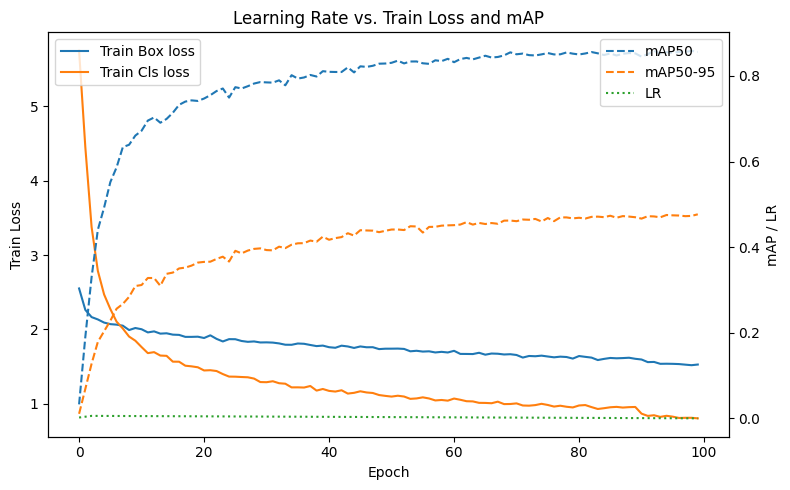

In [19]:
# ===== Plot 1: Train Loss, mAP, LR =====
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot training losses
ax1.plot(df.index, df['train/box_loss'], label='Train Box loss')
ax1.plot(df.index, df['train/cls_loss'], label='Train Cls loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train Loss')
ax1.legend(loc='upper left')

# Twin axis for mAP and LR
ax2 = ax1.twinx()
ax2.plot(df.index, df['metrics/mAP50(B)'], '--', label='mAP50')
ax2.plot(df.index, df['metrics/mAP50-95(B)'], '--', label='mAP50-95')
ax2.plot(df.index, df['lr/pg0'], ':', label='LR')
ax2.set_ylabel('mAP / LR')
ax2.legend(loc='upper right')

plt.title('Learning Rate vs. Train Loss and mAP')
plt.tight_layout()
plt.savefig('train_loss_vs_map_lr.png', dpi=300)
plt.show()  # Show plot 1

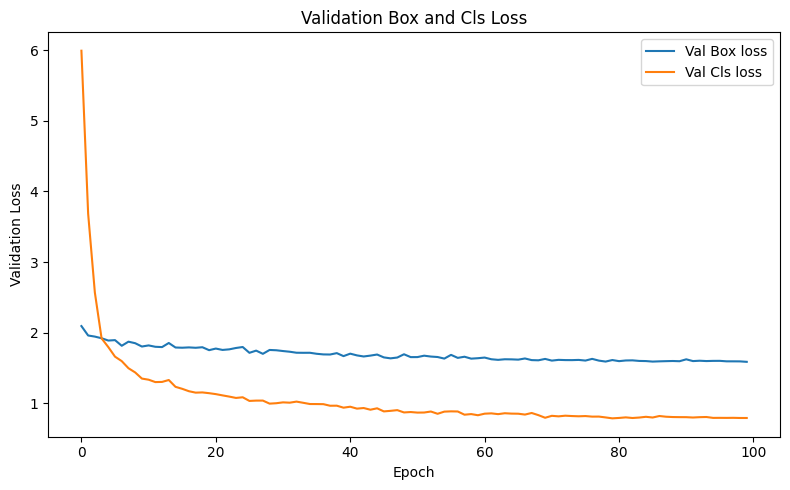

In [20]:
# ===== Plot 2: Validation Losses =====
fig2, ax = plt.subplots(figsize=(8, 5))
ax.plot(df.index, df['val/box_loss'], label='Val Box loss')
ax.plot(df.index, df['val/cls_loss'], label='Val Cls loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')
ax.legend()
plt.title('Validation Box and Cls Loss')
plt.tight_layout()
plt.savefig('val_loss.png', dpi=300)
plt.show()  # Show plot 2

## Visualize Sample Object Detection

In [21]:
test_folder = "/content/mkthesis-v4-3/test/images"


image 1/1 /content/mkthesis-v4-3/test/images/00001452_jpg.rf.5ca85ba18757d0cc3a2e5487db952419.jpg: 640x640 6 PCIs, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


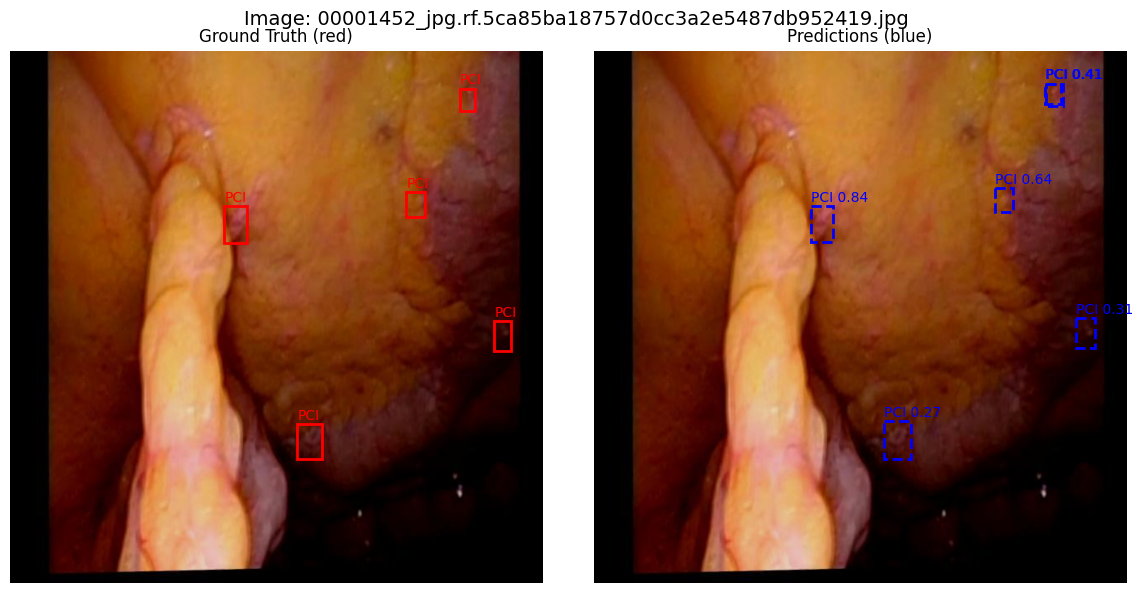


image 1/1 /content/mkthesis-v4-3/test/images/00000687_jpg.rf.fbe2aee64f662ffa7fca4a84aeda24c8.jpg: 640x640 9 PCIs, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


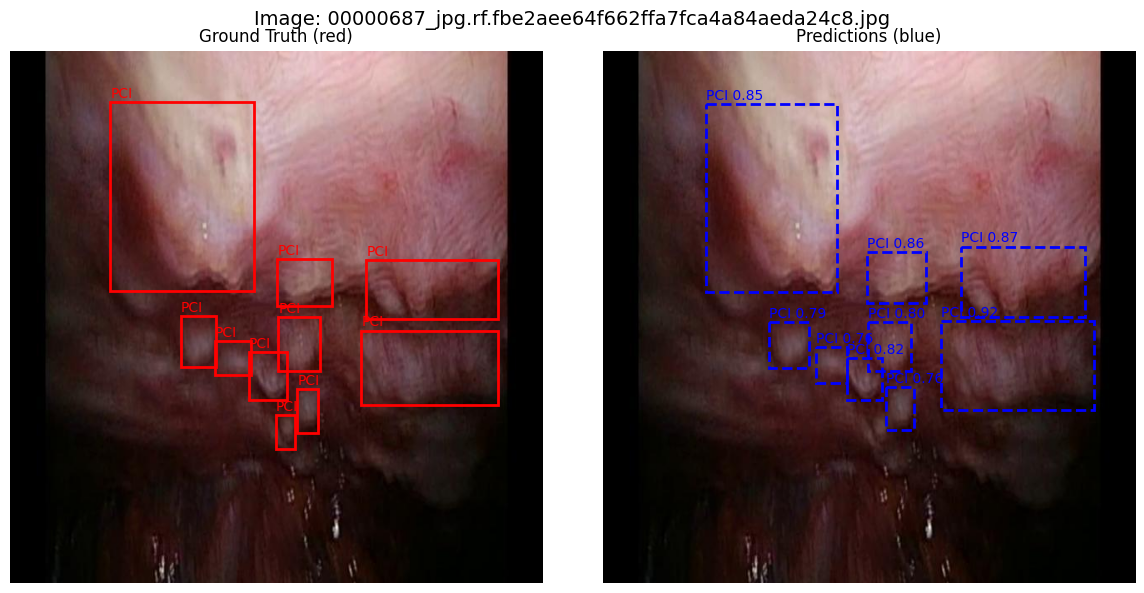


image 1/1 /content/mkthesis-v4-3/test/images/00002026_jpg.rf.08d9ffef7c393810c1b00bf698403039.jpg: 640x640 9 PCIs, 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


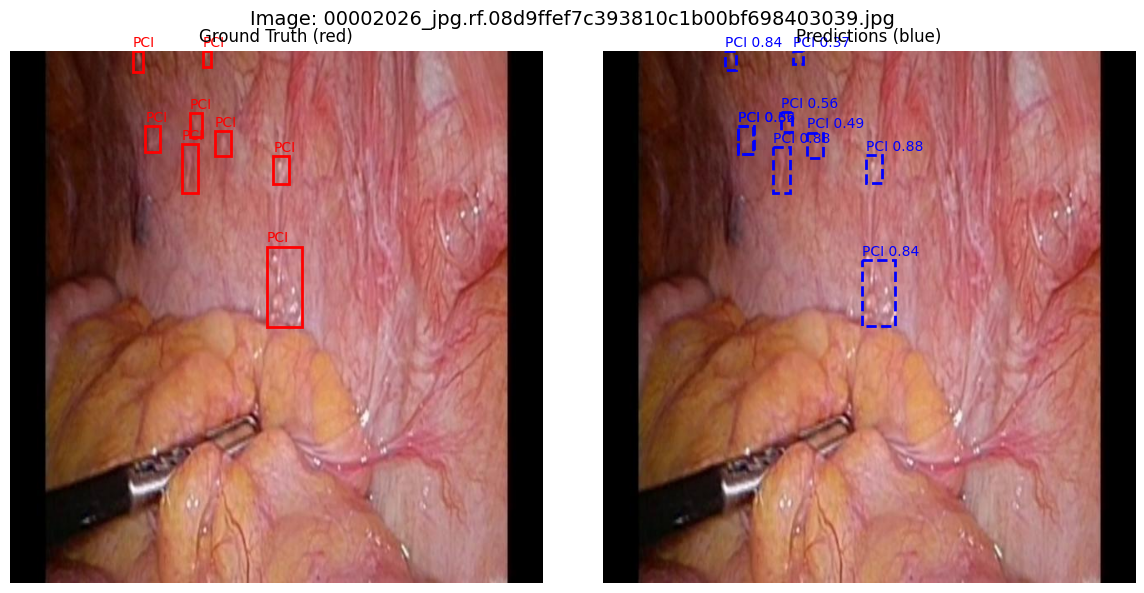


image 1/1 /content/mkthesis-v4-3/test/images/00002452_jpg.rf.1bdcd3dc7b071b703447ffe6efa60218.jpg: 640x640 6 PCIs, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


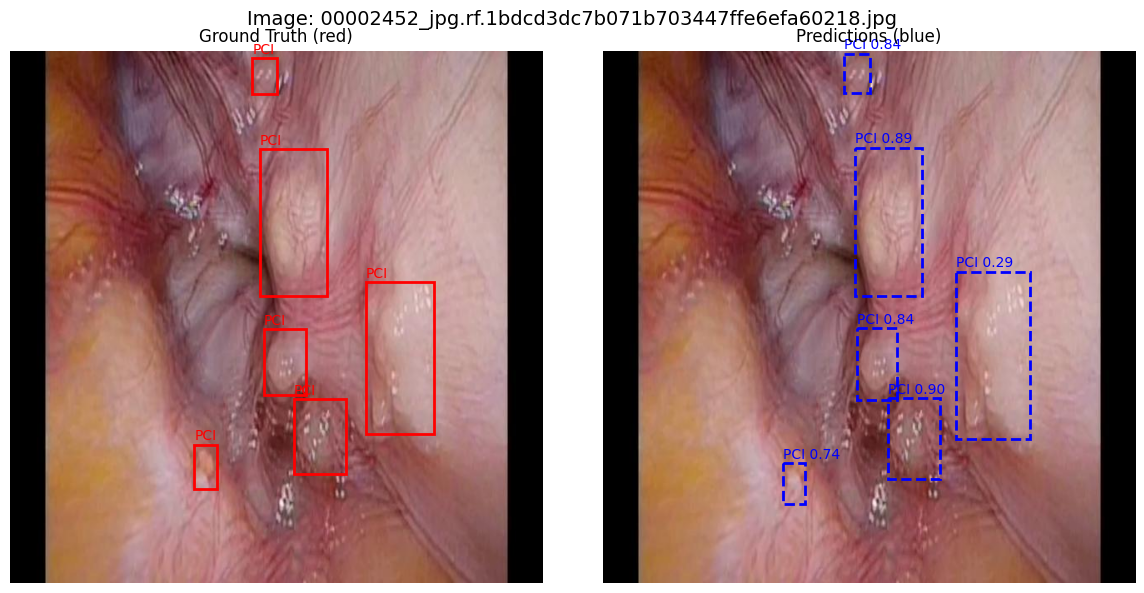


image 1/1 /content/mkthesis-v4-3/test/images/00002000_jpg.rf.f701a52b4d1f59db620e77c50335c516.jpg: 640x640 8 PCIs, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


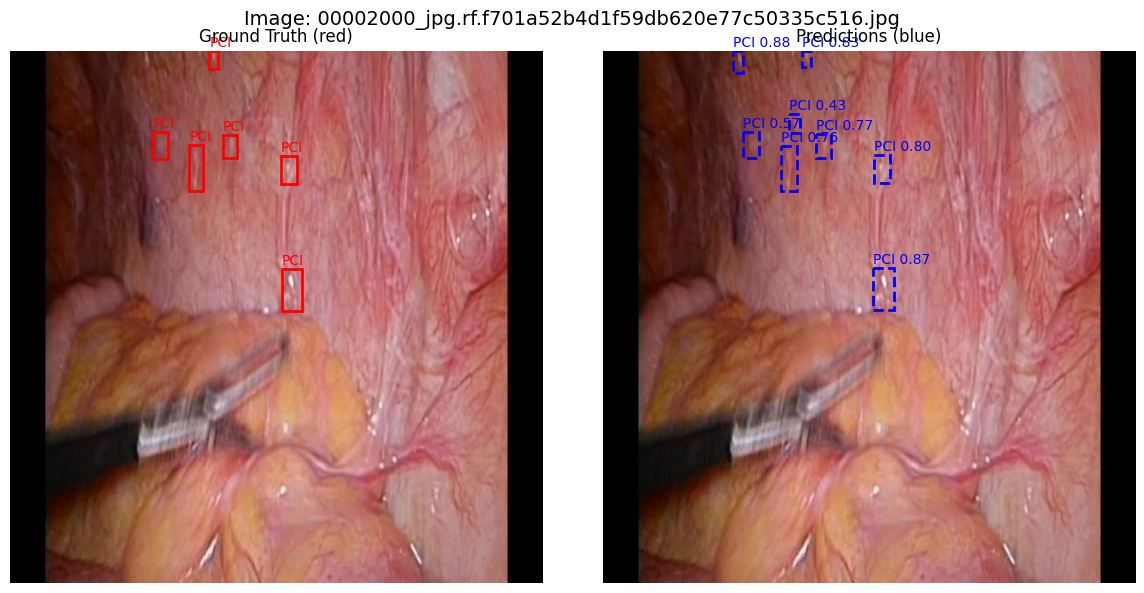

In [22]:
test_images_dir = pathlib.Path(test_folder)
test_labels_dir = test_images_dir.parent / 'labels'

all_test_images = list(test_images_dir.glob('*.jpg')) + list(test_images_dir.glob('*.png'))
if not all_test_images:
    raise RuntimeError(f"No images found in {test_images_dir}")

N = 5
sample_images = random.sample(all_test_images, k=min(N, len(all_test_images)))

for img_path in sample_images:
    img     = cv2.imread(str(img_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    results = best_model.predict(source=str(img_path), conf=0.25)
    preds   = results[0].boxes  # .boxes.xyxy, .boxes.cls, .boxes.conf

    label_file = test_labels_dir / f"{img_path.stem}.txt"
    gt_boxes = []
    if label_file.exists():
        with open(label_file, 'r') as f:
            for line in f:
                toks = line.split()
                if len(toks) < 5:
                    continue
                cls_id   = int(float(toks[0]))
                x_center = float(toks[1])
                y_center = float(toks[2])
                bw       = float(toks[3])
                bh       = float(toks[4])
                x_min = (x_center - bw / 2) * w
                y_min = (y_center - bh / 2) * h
                x_max = (x_center + bw / 2) * w
                y_max = (y_center + bh / 2) * h
                gt_boxes.append((int(x_min), int(y_min), int(x_max), int(y_max), cls_id))
    else:
        print(f"⚠️ Warning: No label file for {img_path.name}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    ax_gt, ax_pred = axes[0], axes[1]

    ax_gt.imshow(img_rgb)
    ax_gt.set_title("Ground Truth (red)")
    ax_gt.axis('off')
    for (xmin, ymin, xmax, ymax, cls_id) in gt_boxes:
        rect = patches.Rectangle(
            (xmin, ymin),
            xmax - xmin,
            ymax - ymin,
            linewidth=2,
            edgecolor='red',
            facecolor='none',
            linestyle='-'
        )
        ax_gt.add_patch(rect)
        ax_gt.text(
            xmin,
            ymin - 5,
            f"{best_model.names[cls_id]}",
            color='red',
            fontsize=10
        )

    ax_pred.imshow(img_rgb)
    ax_pred.set_title("Predictions (blue)")
    ax_pred.axis('off')
    for box in preds:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        cls_id = int(box.cls.cpu().numpy()[0])
        conf   = float(box.conf.cpu().numpy()[0])
        rect = patches.Rectangle(
            (x1, y1),
            x2 - x1,
            y2 - y1,
            linewidth=2,
            edgecolor='blue',
            facecolor='none',
            linestyle='--'
        )
        ax_pred.add_patch(rect)
        ax_pred.text(
            x1,
            y1 - 5,
            f"{best_model.names[cls_id]} {conf:.2f}",
            color='blue',
            fontsize=10
        )

    plt.suptitle(f"Image: {img_path.name}", fontsize=14)
    plt.tight_layout()
    plt.show()



image 1/1 /content/mkthesis-v4-3/test/images/00000234_jpg.rf.1ca307aa92fd360883ee2f68764b9628.jpg: 640x640 1 PCI, 13.1ms
Speed: 2.2ms preprocess, 13.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


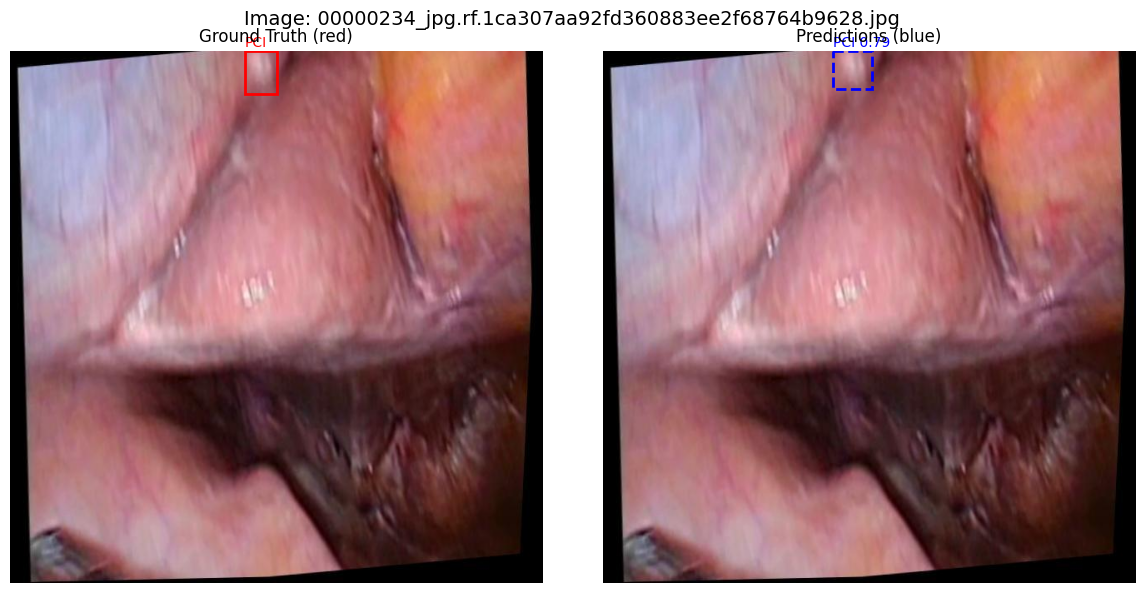


image 1/1 /content/mkthesis-v4-3/test/images/00000441_jpg.rf.df7f7f99553e76badab7a9d45d08f920.jpg: 640x640 2 PCIs, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


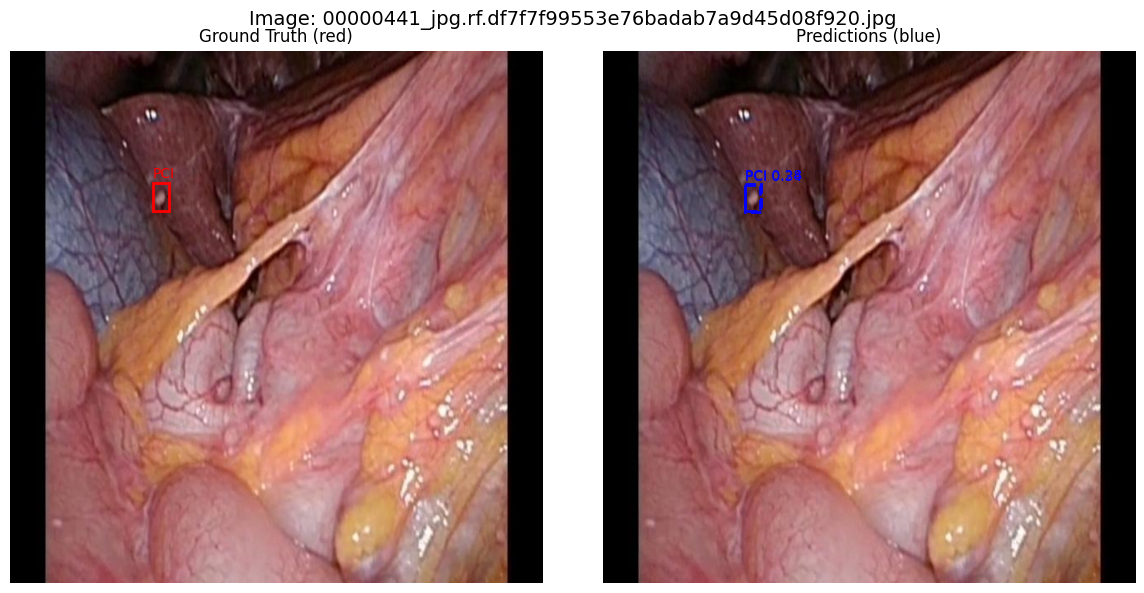


image 1/1 /content/mkthesis-v4-3/test/images/00002444_jpg.rf.54bffc79ada236e5dc03f0906a2411e6.jpg: 640x640 5 PCIs, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


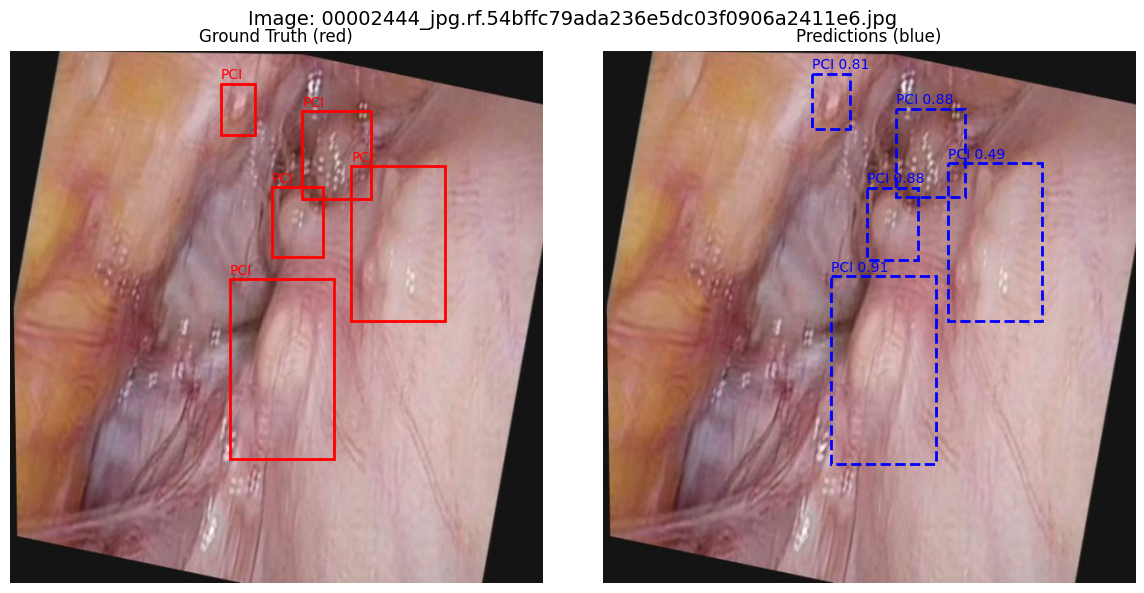


image 1/1 /content/mkthesis-v4-3/test/images/00000292_jpg.rf.a06c9f0e28a38eef4ef8e2a8ec26ad67.jpg: 640x640 1 PCI, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


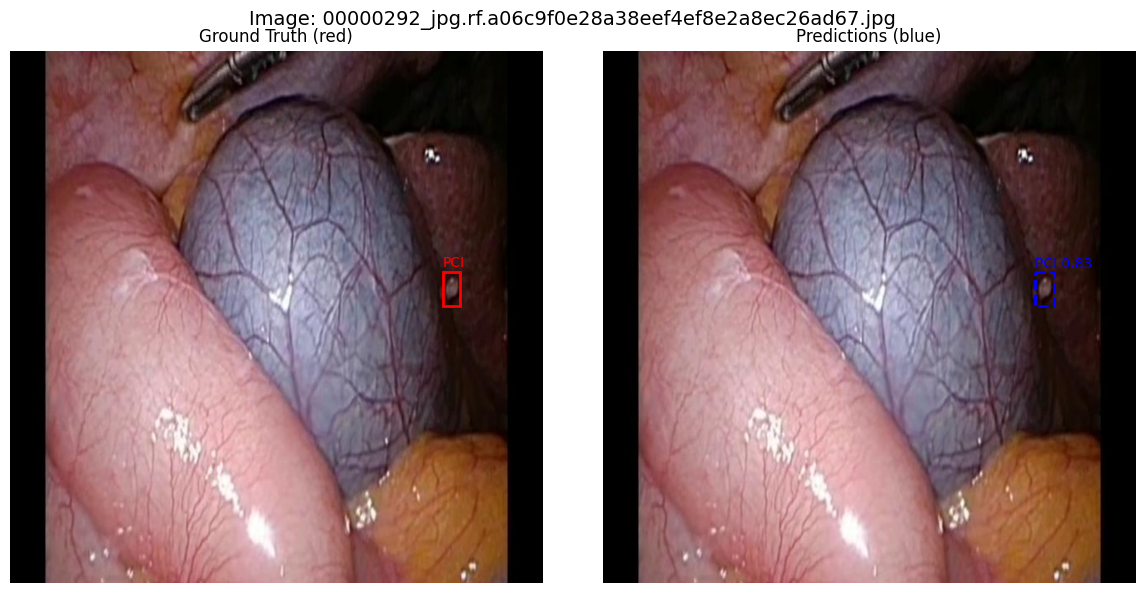


image 1/1 /content/mkthesis-v4-3/test/images/00000326_jpg.rf.dbda88e7b21f071d4d9c71c019793811.jpg: 640x640 1 PCI, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


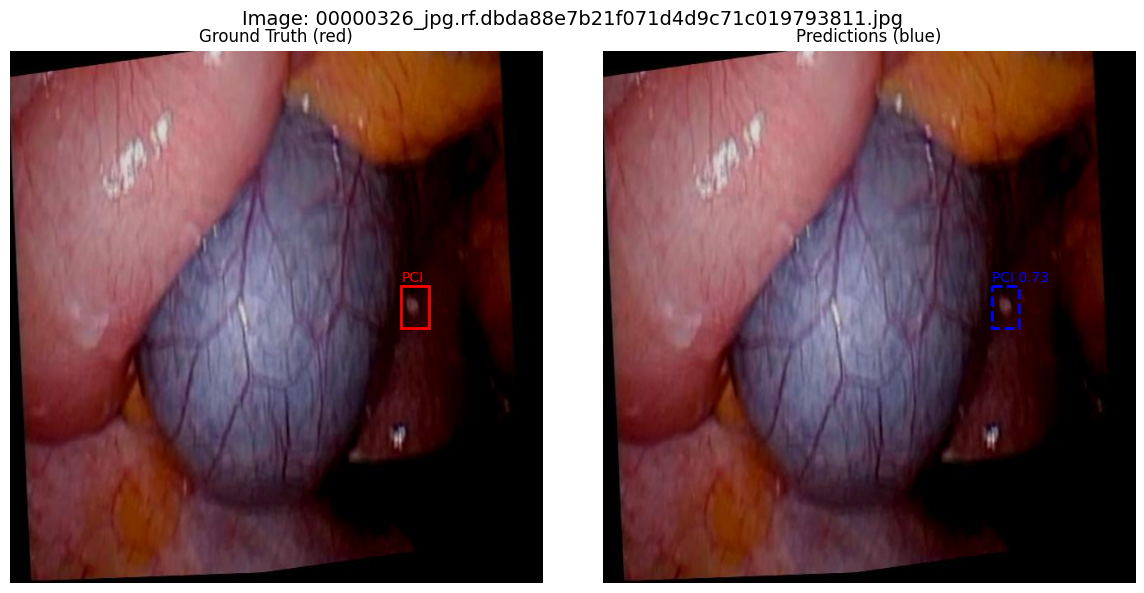

In [23]:
output_dir = Path("sample_visualizations")
output_dir.mkdir(parents=True, exist_ok=True)

N = 5
sample_images = random.sample(all_test_images, k=min(N, len(all_test_images)))

for img_path in sample_images:
    img     = cv2.imread(str(img_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    results = best_model.predict(source=str(img_path), conf=0.25)
    preds   = results[0].boxes

    label_file = test_labels_dir / f"{img_path.stem}.txt"
    gt_boxes = []
    if label_file.exists():
        with open(label_file, 'r') as f:
            for line in f:
                toks = line.split()
                if len(toks) < 5:
                    continue
                cls_id   = int(float(toks[0]))
                x_center = float(toks[1])
                y_center = float(toks[2])
                bw       = float(toks[3])
                bh       = float(toks[4])
                x_min = (x_center - bw / 2) * w
                y_min = (y_center - bh / 2) * h
                x_max = (x_center + bw / 2) * w
                y_max = (y_center + bh / 2) * h
                gt_boxes.append((int(x_min), int(y_min), int(x_max), int(y_max), cls_id))
    else:
        print(f"⚠️ Warning: No label file for {img_path.name}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    ax_gt, ax_pred = axes[0], axes[1]

    ax_gt.imshow(img_rgb)
    ax_gt.set_title("Ground Truth (red)")
    ax_gt.axis('off')
    for (xmin, ymin, xmax, ymax, cls_id) in gt_boxes:
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax_gt.add_patch(rect)
        ax_gt.text(xmin, ymin - 5, f"{best_model.names[cls_id]}", color='red', fontsize=10)

    ax_pred.imshow(img_rgb)
    ax_pred.set_title("Predictions (blue)")
    ax_pred.axis('off')
    for box in preds:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        cls_id = int(box.cls.cpu().numpy()[0])
        conf   = float(box.conf.cpu().numpy()[0])
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth=2, edgecolor='blue', facecolor='none', linestyle='--')
        ax_pred.add_patch(rect)
        ax_pred.text(x1, y1 - 5, f"{best_model.names[cls_id]} {conf:.2f}", color='blue', fontsize=10)

    plt.suptitle(f"Image: {img_path.name}", fontsize=14)
    plt.tight_layout()

    # ✅ Save the figure
    output_path = output_dir / f"{img_path.stem}_gt_vs_pred.png"
    plt.savefig(output_path, dpi=300)
    plt.show()


## Export Prediction Results as CSV

In [24]:
# ---- Export Prediction Results ----
prediction_data = []
for img_path in all_test_images:
    results = best_model.predict(source=str(img_path), conf=0.25)
    preds = results[0].boxes
    for box in preds:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        cls_id = int(box.cls.cpu().numpy()[0])
        conf = float(box.conf.cpu().numpy()[0])
        prediction_data.append({
            "Image": img_path.name,
            "Class ID": cls_id,
            "Class Name": best_model.names[cls_id],
            "Confidence": conf,
            "X1": x1,
            "Y1": y1,
            "X2": x2,
            "Y2": y2
        })
df_preds = pd.DataFrame(prediction_data)
df_preds.to_csv("prediction_results.csv", index=False)
print("✅ Exported prediction_results.csv")


image 1/1 /content/mkthesis-v4-3/test/images/00002747_jpg.rf.06e8dc8790fa1f647c5bca52fa7cc8c0.jpg: 640x640 2 PCIs, 12.9ms
Speed: 1.7ms preprocess, 12.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/mkthesis-v4-3/test/images/00002487_jpg.rf.ae568dbe33b1e90183b173ada8f32169.jpg: 640x640 2 PCIs, 10.9ms
Speed: 1.5ms preprocess, 10.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/mkthesis-v4-3/test/images/00000061_jpg.rf.26b7990ff8840681408f9574f38d3267.jpg: 640x640 1 PCI, 11.2ms
Speed: 1.4ms preprocess, 11.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/mkthesis-v4-3/test/images/00002027_jpg.rf.3ae26ce388cc9457d7b8b3c7c10a1c22.jpg: 640x640 8 PCIs, 10.6ms
Speed: 1.4ms preprocess, 10.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/mkthesis-v4-3/test/images/00000101_jpg.rf.63ba862e3a391f76e4f32578cc3c9ce4.jpg: 640x640 2 PCIs, 10.4m

In [25]:
import datetime
from zipfile import ZipFile
import shutil
import os
from pathlib import Path
from google.colab import drive

DATASET_TYPE = "MKThesis-v4"
model_name = "yolo26n"
yaml_path = "/content/mkthesis-v4-3/data.yaml"

# === Define dynamic export folder name based on YAML + timestamp ===
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
clean_dataset = DATASET_TYPE.replace(" ", "_")
export_name = f"{model_name}_{clean_dataset}_{timestamp}"
export_dir = Path(export_name)
export_dir.mkdir(parents=True, exist_ok=True)

# === List of files to export ===
export_files = [
    "cm_test.csv",
    "per_class_metrics.csv",
    "train_loss_vs_map_lr.png",
    "val_loss.png",
    "model_summary.txt",
    "test_metrics.txt",
    "prediction_results.csv",
    yaml_path
]
# === Copy export files into the export folder ===
for file in export_files:
    src = Path(file)
    dst = export_dir / f"{src.stem}_{export_name}{src.suffix}"
    shutil.copy(src, dst)

# === Copy best.pt and last.pt directly to the root of export folder ===
weights_dir = Path("/content/runs/detect/train/weights")
for weight_name in ["best.pt", "last.pt"]:
    weight_path = weights_dir / weight_name
    if weight_path.exists():
        weight_stem = Path(weight_name).stem
        weight_suffix = Path(weight_name).suffix
        renamed = f"{weight_stem}_{export_name}{weight_suffix}"
        shutil.copy(weight_path, export_dir / renamed)

# === Copy sample visualizations ===
sample_vis_dir = Path("sample_visualizations")
sample_vis_export = export_dir / f"sample_visualizations_{export_name}"
shutil.copytree(sample_vis_dir, sample_vis_export)

# === Copy HaYOLO runs/detect directory ===
detect_src = Path("/content/runs/detect")
detect_dst = export_dir / f"detect_outputs_{export_name}"
shutil.copytree(detect_src, detect_dst)

# === Zip the export directory ===
zip_filename = f"{export_name}.zip"
shutil.make_archive(base_name=export_name, format='zip', root_dir=export_dir)
print(f"✅ Zipped everything into {zip_filename}")

✅ Zipped everything into yolo26n_MKThesis-v4_2026-01-27_04-06-28.zip


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
# === Mount Google Drive and copy the zip file ===
try:
    # Create the ThesisYOLO folder if it doesn't exist
    thesis_yolo_folder = Path('/content/drive/MyDrive/ThesisYOLO')
    thesis_yolo_folder.mkdir(parents=True, exist_ok=True)
    drive_path = thesis_yolo_folder / zip_filename
    shutil.copy(zip_filename, drive_path)
    print(f"✅ Copied {zip_filename} to Google Drive: {drive_path}")
except Exception as e:
    print(f"❌ Failed to copy to Google Drive: {e}")

✅ Copied yolo26n_MKThesis-v4_2026-01-27_04-06-28.zip to Google Drive: /content/drive/MyDrive/ThesisYOLO/yolo26n_MKThesis-v4_2026-01-27_04-06-28.zip
